<a href="https://colab.research.google.com/github/twishackaul/Polycystic-Ovarian-Syndrome-Classifier/blob/main/PCOS_Detection_Clinical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [181]:
import warnings
warnings .filterwarnings('ignore')

Downloading dataset using API

In [182]:
# clinical data

!kaggle datasets download -d shreyasvedpathak/pcos-dataset

Dataset URL: https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset
License(s): copyright-authors
pcos-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [183]:
import zipfile
zip_ref = zipfile.ZipFile("/content/pcos-dataset.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [185]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [186]:
import os
import zipfile

In [187]:
pcos_dataset = os.path.join('/content', 'pcos-dataset.zip')
with zipfile.ZipFile(pcos_dataset, 'r') as zip_ref:
    with zip_ref.open('PCOS_data.csv') as extracted_file:
        with open('PCOS_data.csv', 'wb') as output_file:
            output_file.write(extracted_file.read())

In [188]:
pcos_df = pd.read_csv('/content/PCOS_data.csv')

In [189]:
pcos_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [190]:
print(pcos_df.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [191]:
pcos_df = pcos_df.drop(["Sl. No","Patient File No."],axis = 1)

In [192]:
pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [193]:
pcos_df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [194]:
pcos_df = pcos_df.loc[:, ~pcos_df.columns.str.contains('^Unnamed')]

In [195]:
pcos_df["AMH(ng/mL)"].head()

,AMH(ng/mL)
0,2.07
1,1.53
2,6.63
3,1.22
4,2.26


In [196]:
pcos_df["II    beta-HCG(mIU/mL)"].head()

,II beta-HCG(mIU/mL)
0,1.99
1,1.99
2,494.08
3,1.99
4,801.45


In [197]:
# converting object type to numerical

pcos_df["AMH(ng/mL)"] = pd.to_numeric(pcos_df["AMH(ng/mL)"], errors='coerce')
pcos_df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos_df["II    beta-HCG(mIU/mL)"], errors='coerce')

##Categorical values:-
- PCOS (Y/N)
- Pregnant (Y/N)
- Weight gain (Y/N)
- hair growth(Y/N)
- Skin darkening (Y/N)
- Hair loss(Y/N)
- Pimples(Y/N)
- Fast food (Y/N)
- Reg.Exercise(Y/N)
- Blood Group



In [198]:
# bar graph plotting for categorical values

colors = ['blue', 'orange']

In [199]:
def bar_plot(variable):

    #get feature
    var = pcos_df[variable]

    #count number of categorical variable
    vValue = var.value_counts()

    # plotting
    plt.figure(figsize = (9,3))
    plt.bar(vValue.index,vValue,color=colors)
    plt.xticks(vValue.index,vValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,vValue))

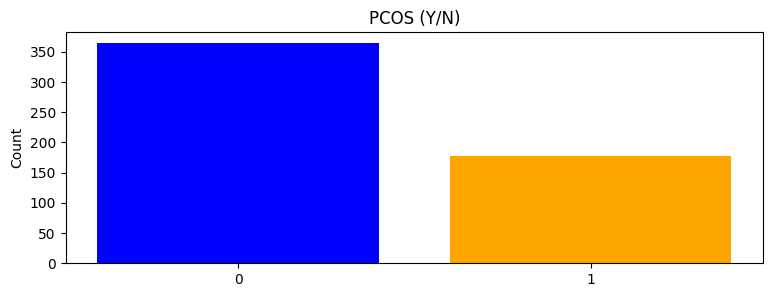

PCOS (Y/N): 
 PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


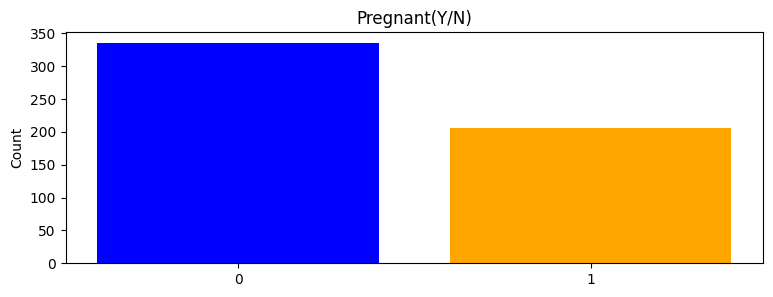

Pregnant(Y/N): 
 Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


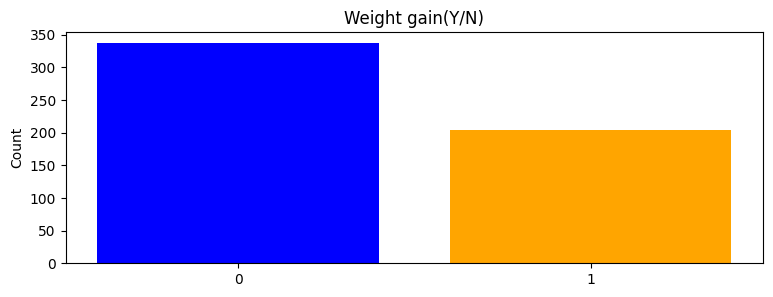

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


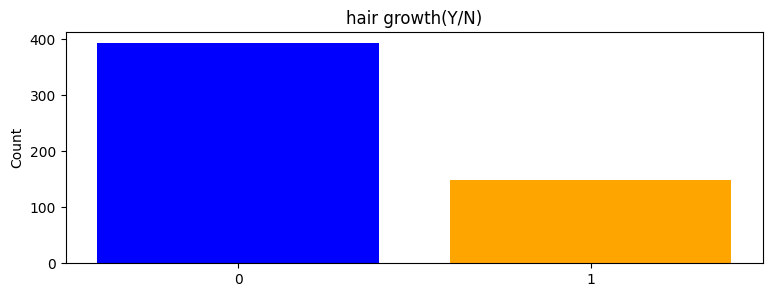

hair growth(Y/N): 
 hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


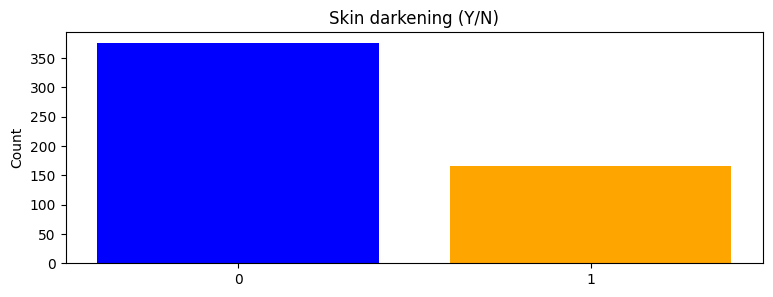

Skin darkening (Y/N): 
 Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


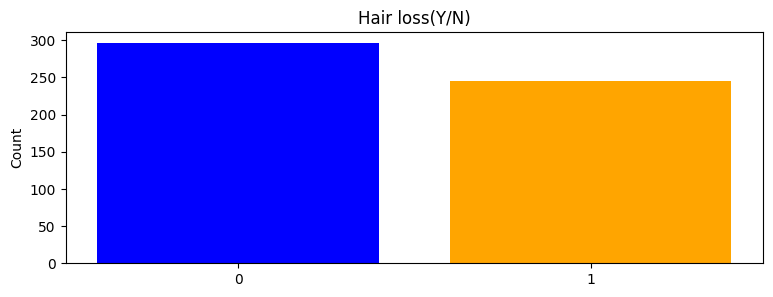

Hair loss(Y/N): 
 Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


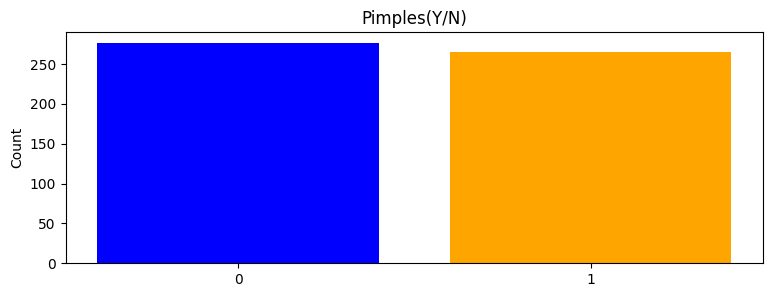

Pimples(Y/N): 
 Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


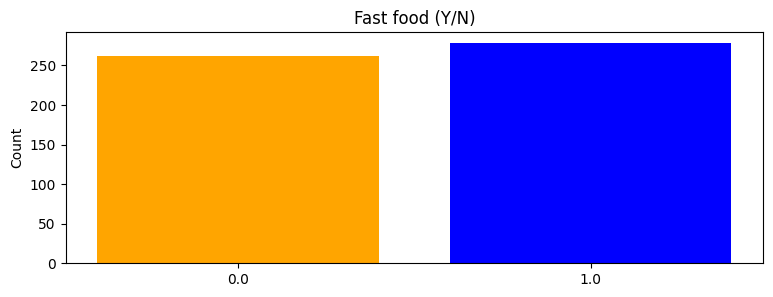

Fast food (Y/N): 
 Fast food (Y/N)
1.0    278
0.0    262
Name: count, dtype: int64


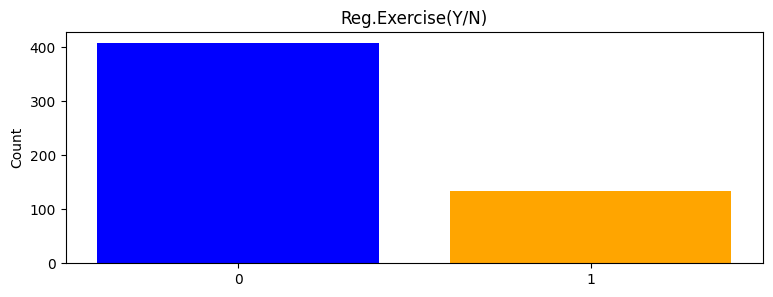

Reg.Exercise(Y/N): 
 Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


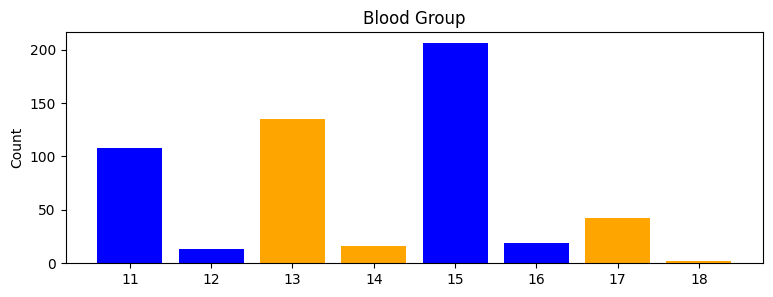

Blood Group: 
 Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


In [200]:
category = ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)",
            "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]

for c in category:
    bar_plot(c)

## Numerical Variable:-
- Age (yrs)
- Weight (Kg)
- Marraige Status (Yrs)
- Cycle length(days)
-BMI
........

In [201]:
# plotting histogram for numerical values

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(pcos_df[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

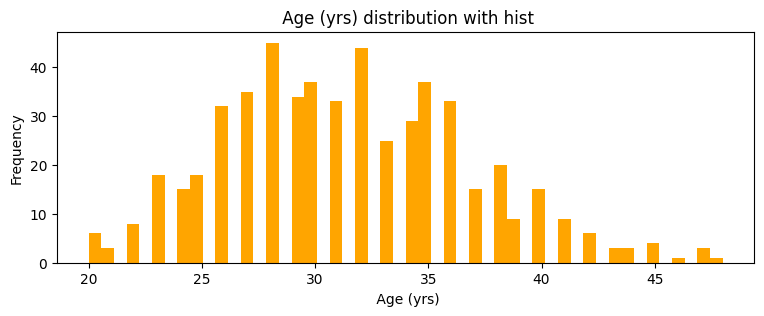

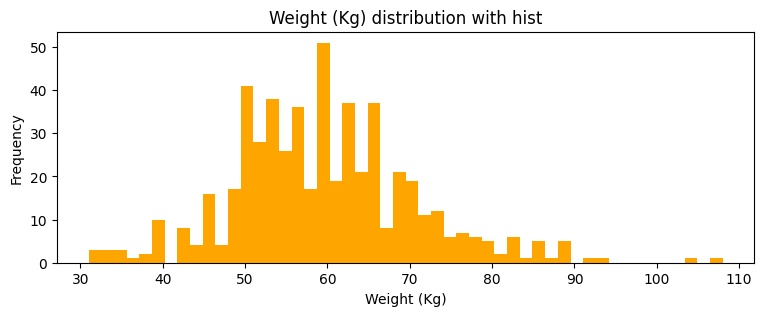

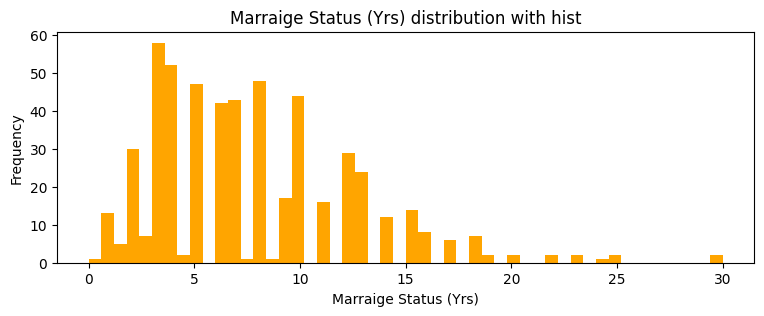

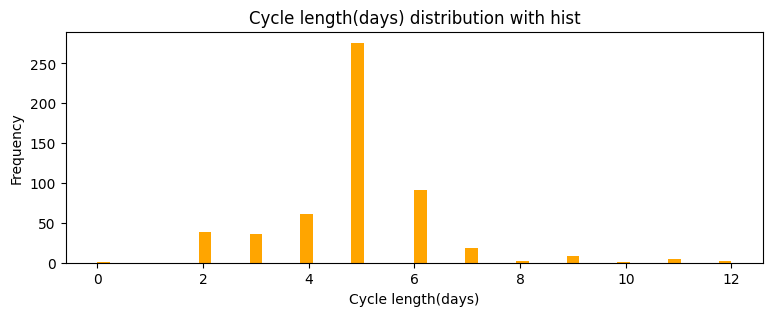

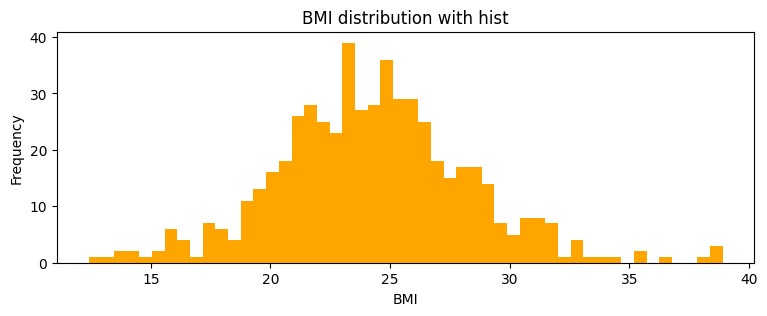

In [202]:
numerical = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)", "Cycle length(days)", "BMI"]
for n in numerical:
    plot_hist(n)

In [203]:
# Handling missing values if any

pcos_df.columns[pcos_df.isnull().any()]

Index(['Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)',
       'Fast food (Y/N)'],
      dtype='object')

In [204]:
# filling nan values with median values

pcos_df['Marraige Status (Yrs)'].fillna(pcos_df['Marraige Status (Yrs)'].median(), inplace=True)
pcos_df['II    beta-HCG(mIU/mL)'].fillna(pcos_df['II    beta-HCG(mIU/mL)'].median(), inplace=True)
pcos_df['AMH(ng/mL)'].fillna(pcos_df['AMH(ng/mL)'].median(), inplace=True)
pcos_df['Fast food (Y/N)'].fillna(pcos_df['Fast food (Y/N)'].median(), inplace=True)

In [205]:
# checking no. of missing values if any still present

pcos_df.isnull().sum()

,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0


## Correlation Matrix

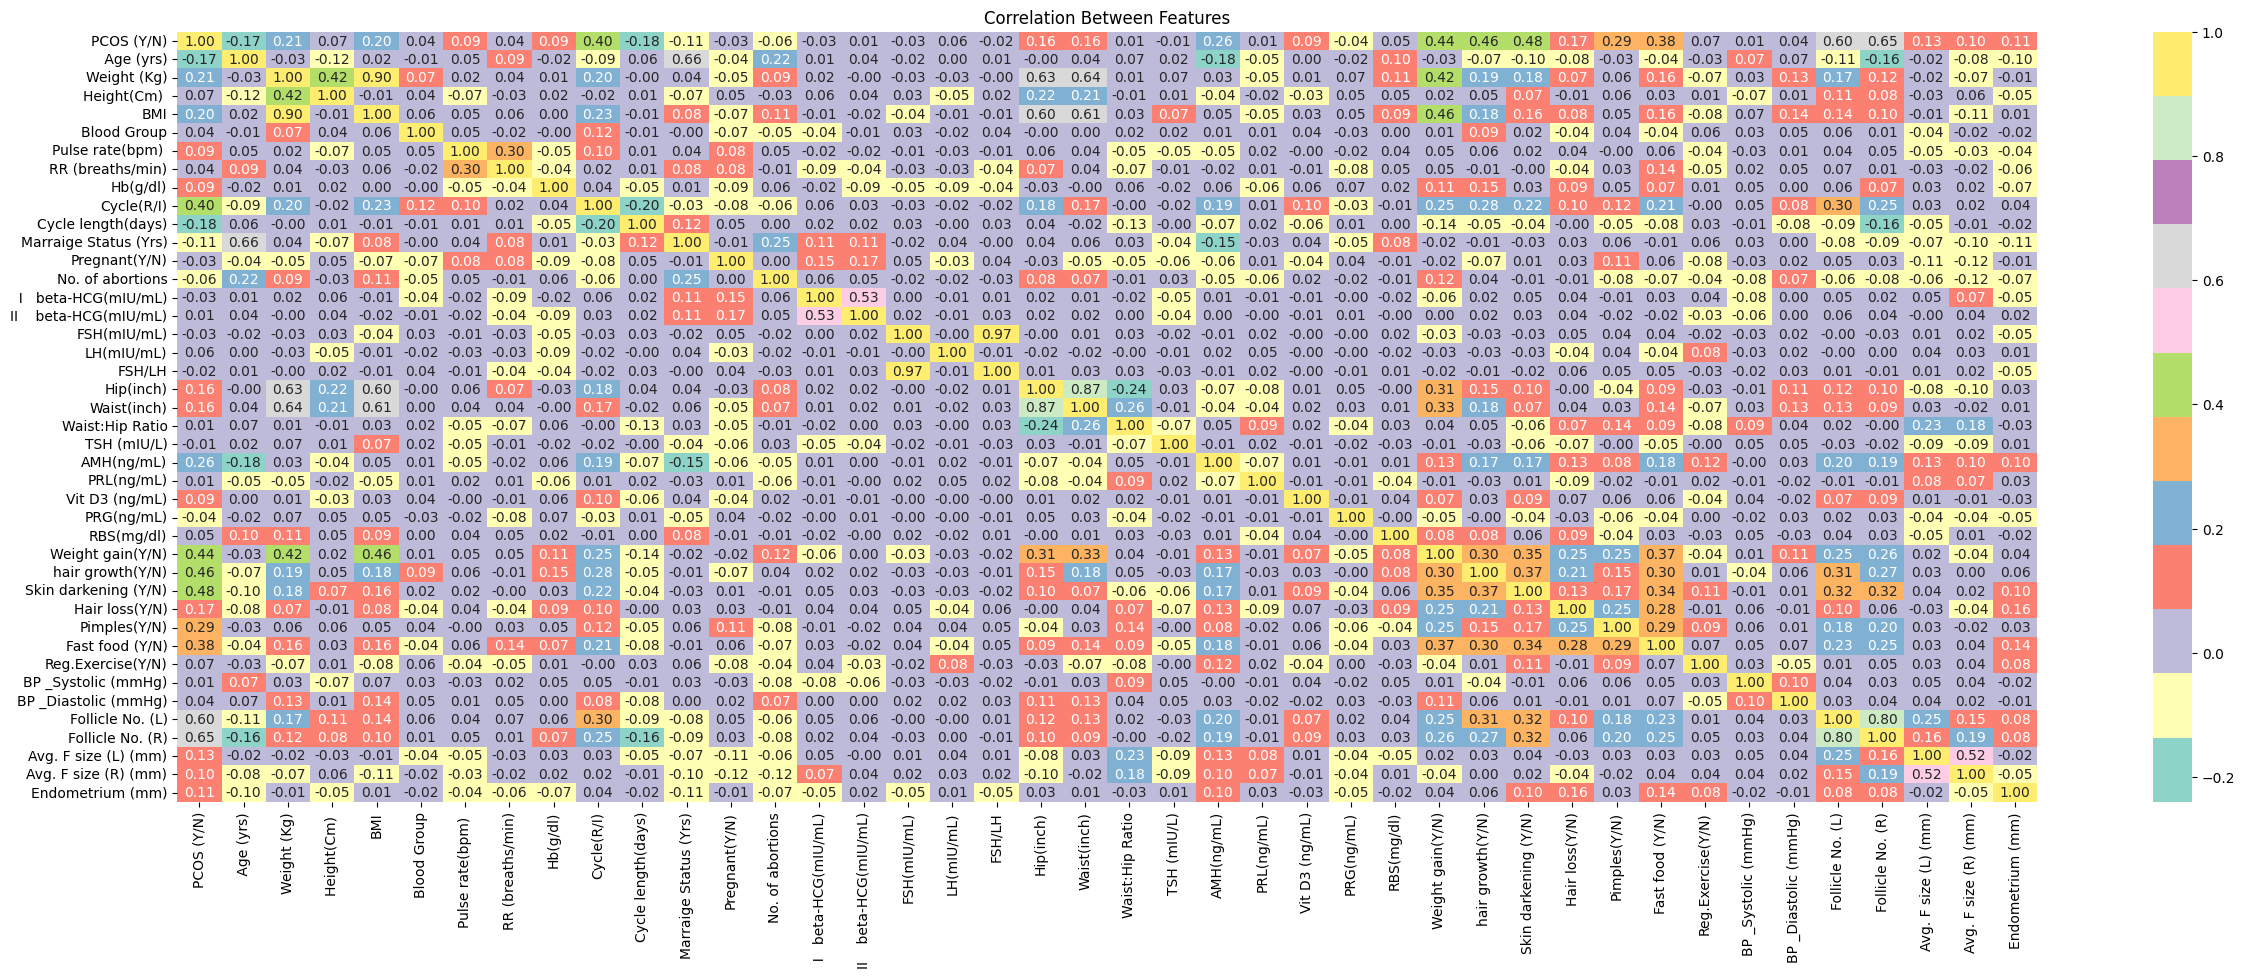

In [206]:
Co_M= pcos_df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(Co_M, cmap="Set3", annot = True, fmt = ".2f");     # for float ---> .2f   for int ---> d
plt.title("Correlation Between Features")
plt.show()

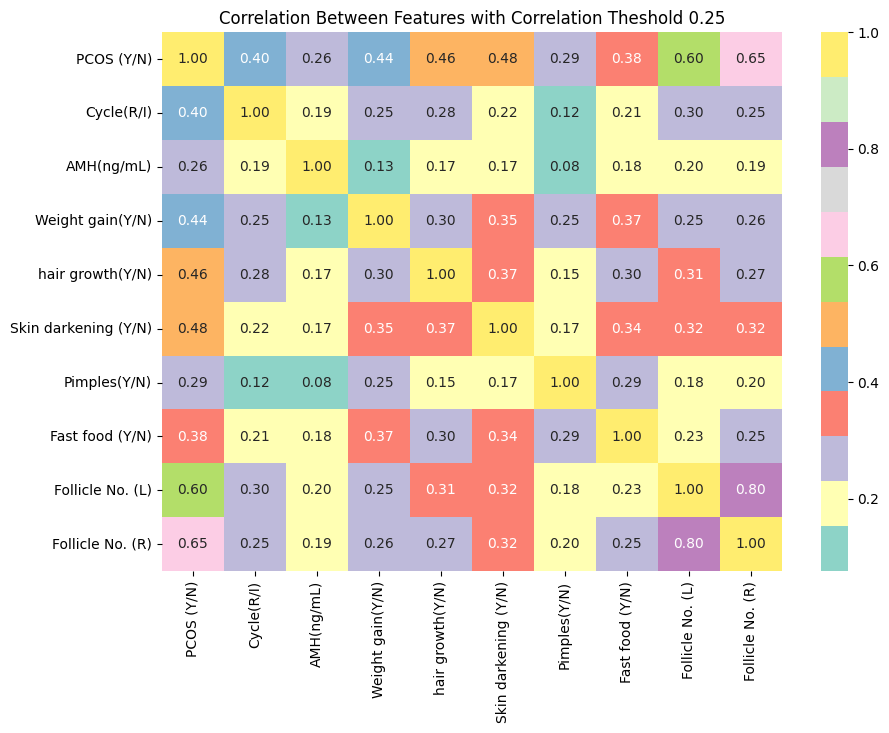

In [207]:
# properties with relationship greater than 0.25 with the PCOS (Y/N)

threshold = 0.25
filtre = np.abs(Co_M["PCOS (Y/N)"]) > threshold
corr_features = Co_M.columns[filtre].tolist()
plt.subplots(figsize=(10,7))
sns.heatmap(pcos_df[corr_features].corr(),cmap="Set3", annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Correlation Theshold 0.25")
plt.show()

## Train Test Split

In [208]:
X = pcos_df.drop(columns = ["PCOS (Y/N)"])
y = pcos_df["PCOS (Y/N)"]

In [209]:
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [212]:
X_train.shape, X_test.shape

((378, 41), (163, 41))

In [213]:
y_train.shape, y_test.shape

((378,), (163,))

##  Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
clinical_lr_train = round(logistic_reg.score(X_train, y_train)*100,2)
clinical_lr_test = round(logistic_reg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(clinical_lr_train))
print("Testing Accuracy: % {}".format(clinical_lr_test))

Training Accuracy: % 86.77
Testing Accuracy: % 84.05


## We will compare 5 ML classifiers and evaluate mean accuracy of each of them by *Stratified Cross Validation*.
- Decision Tree
- Support Vector Classifier
- Random Forest
- K Nearest Neighbor
- Logistic Regression

In [216]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [217]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

In [218]:
decision_tree = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

In [219]:
svm = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

In [220]:
random_forest = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

In [221]:
logistic_regression = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

In [222]:
knn = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

In [223]:
classifier_grid = [decision_tree,
                   svm,
                   random_forest,
                   logistic_regression,
                   knn]

In [224]:
cv_result = []

In [225]:
best_estimators = []

In [226]:
# fitting model to find best accuracy out of the 5 models

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_grid[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100, 2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
88.09
Fitting 10 folds for each of 28 candidates, totalling 280 fits
72.5
Fitting 10 folds for each of 48 candidates, totalling 480 fits
89.96
Fitting 10 folds for each of 14 candidates, totalling 140 fits
85.48
Fitting 10 folds for each of 40 candidates, totalling 400 fits
75.63





---


### Decision Tree: 85.97%
### SVC: 74.62%
### **Random Forest: 92.58% (the highest accuracy in this case)**
### Logistic Regression: 87.06%
### K-Nearest Neighbors: 77.02%



---

In [227]:
# best estimators out of all the algorithms used in hyperparameter tuning

best_estimators

[DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42),
 SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=6, n_estimators=300, random_state=42),
 LogisticRegression(C=10.0, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=13)]

In [228]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

## XGBRF Classifier

In [229]:
import xgboost as xgb

In [230]:
xgbrf = xgb.XGBRFClassifier(max_depth=3, random_state=random_state)

In [231]:
xgbrf.fit(X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=None, ...)

In [232]:
clinical_xgbrf_train = round(xgbrf.score(X_train, y_train)*100, 2)
clinical_xgbrf_test = round(xgbrf.score(X_test, y_test)*100, 2)

In [233]:
cv_result.append(clinical_xgbrf_train)

In [234]:
print("Training Accuracy: % {}".format(clinical_xgbrf_train))
print("Testing Accuracy: % {}".format(clinical_xgbrf_test))

Training Accuracy: % 93.65
Testing Accuracy: % 87.73


In [235]:
y_pred = xgbrf.predict(X_test)

In [236]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score

In [237]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
CM

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,   8],
       [ 12,  43]], dtype=int32)>

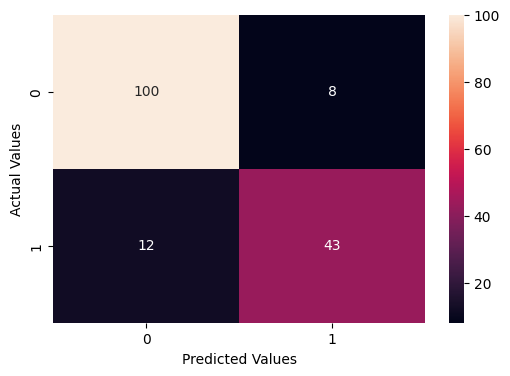

In [238]:
plt.figure(figsize = (6,4))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [239]:
CM = np.array(CM)
TN, FP, FN, TP = CM.ravel()

In [240]:
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)

In [241]:
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")

True Positives (TP): 43
True Negatives (TN): 100
False Positives (FP): 8
False Negatives (FN): 12
Recall: 0.78
F1 Score: 0.81
Precision: 0.84


## CatBoost Classifier

In [242]:
!pip install catboost

In [243]:
from catboost import CatBoostClassifier

In [244]:
cat = CatBoostClassifier()

In [245]:
model_cat = cat.fit(X_train, y_train)

Learning rate set to 0.0068
0:	learn: 0.6878400	total: 8.98ms	remaining: 8.97s
1:	learn: 0.6820486	total: 13.2ms	remaining: 6.56s
2:	learn: 0.6761977	total: 17.8ms	remaining: 5.92s
3:	learn: 0.6704984	total: 22.4ms	remaining: 5.57s
4:	learn: 0.6640838	total: 27ms	remaining: 5.37s
5:	learn: 0.6581062	total: 31.4ms	remaining: 5.2s
6:	learn: 0.6523669	total: 35.5ms	remaining: 5.03s
7:	learn: 0.6478675	total: 39.6ms	remaining: 4.91s
8:	learn: 0.6427530	total: 43.9ms	remaining: 4.83s
9:	learn: 0.6380985	total: 47.9ms	remaining: 4.74s
10:	learn: 0.6330988	total: 52.5ms	remaining: 4.72s
11:	learn: 0.6282648	total: 56.5ms	remaining: 4.65s
12:	learn: 0.6241606	total: 60.5ms	remaining: 4.59s
13:	learn: 0.6188060	total: 65ms	remaining: 4.57s
14:	learn: 0.6138332	total: 69ms	remaining: 4.53s
15:	learn: 0.6101768	total: 73.3ms	remaining: 4.51s
16:	learn: 0.6060004	total: 77.9ms	remaining: 4.5s
17:	learn: 0.6031698	total: 82.2ms	remaining: 4.49s
18:	learn: 0.5982008	total: 86.8ms	remaining: 4.48s
19

In [246]:
clinical_cat_train = round(cat.score(X_train, y_train)*100, 2)
clinical_cat_test = round(cat.score(X_test, y_test)*100, 2)

In [247]:
cv_result.append(clinical_cat_train)

In [248]:
print("Training Accuracy: % {}".format(clinical_cat_train))
print("Testing Accuracy: % {}".format(clinical_cat_test))

Training Accuracy: % 100.0
Testing Accuracy: % 90.18


In [249]:
y_pred_cat = cat.predict(X_test)

In [250]:
CM_cat = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_cat)
CM_cat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[102,   6],
       [ 10,  45]], dtype=int32)>

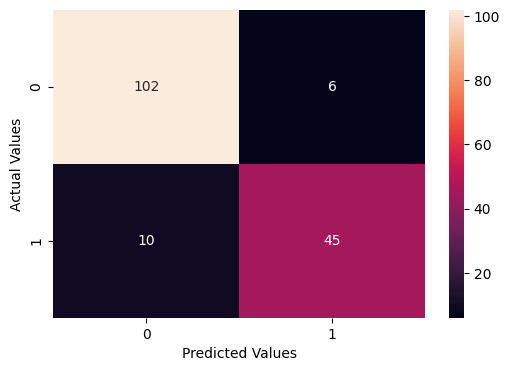

In [251]:
plt.figure (figsize = (6,4))
sns.heatmap(CM_cat, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [252]:
CM_cat = np.array(CM_cat)
TN, FP, FN, TP = CM_cat.ravel()

In [253]:
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)

In [254]:
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Recall: {recall_cat:.2f}")
print(f"F1 Score: {f1_cat:.2f}")
print(f"Precision: {precision_cat:.2f}")

True Positives (TP): 45
True Negatives (TN): 102
False Positives (FP): 6
False Negatives (FN): 10
Recall: 0.82
F1 Score: 0.85
Precision: 0.88


### Comparing both the models

In [255]:
xgb_metrics = {
    'Accuracy': clinical_xgbrf_test,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb
}

cat_metrics = {
    'Accuracy': clinical_cat_test,
    'Precision': precision_cat,
    'Recall': recall_cat,
    'F1 Score': f1_cat
}

In [256]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
xgb_values = [xgb_metrics[metric] for metric in metrics]
cat_values = [cat_metrics[metric] for metric in metrics]

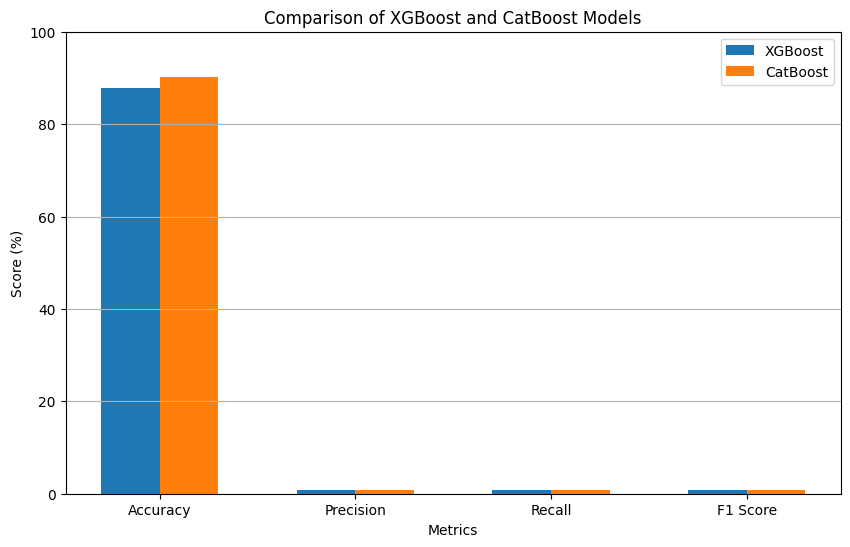

In [257]:
width = 0.3                  # width of the bars
x = np.arange(len(metrics))  # the label locations

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, xgb_values, width, label='XGBoost')
plt.bar(x + width/2, cat_values, width, label='CatBoost')

plt.title('Comparison of XGBoost and CatBoost Models')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [258]:
from math import pi

In [259]:
xgb_values = {
    'Accuracy': [0.87],
    'Precision': [0.83],
    'Recall': [0.75],
    'F1 Score': [0.79]
}

cat_values = {
    'Accuracy': [0.88],
    'Precision': [0.88],
    'Recall': [0.73],
    'F1 Score': [0.80]
}

In [260]:
labels = metrics
num_vars = len(labels)

In [261]:
# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

In [262]:
# Create a function to plot the radar chart
def radar_chart(ax, values, label, color):
    values += values[:1]
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, label=label)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

In [263]:
xgb_values_avg = [np.mean(xgb_values[metric]) for metric in metrics]
cat_values_avg = [np.mean(cat_values[metric]) for metric in metrics]

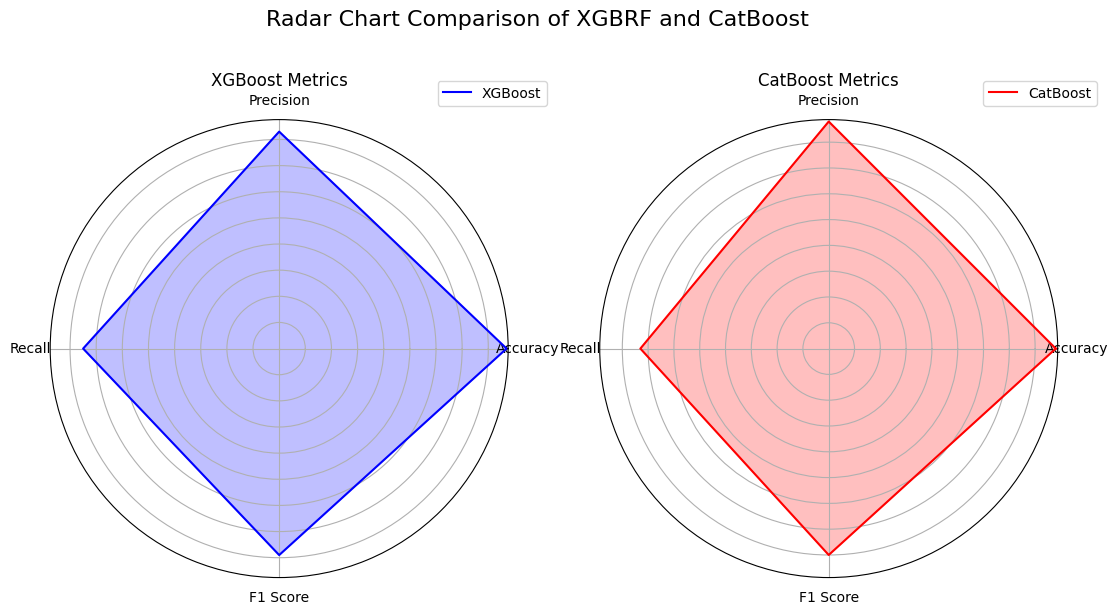

In [264]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7), subplot_kw=dict(polar=True))

radar_chart(ax1, xgb_values_avg, 'XGBoost', 'b')
ax1.set_title('XGBoost Metrics')

radar_chart(ax2, cat_values_avg, 'CatBoost', 'r')
ax2.set_title('CatBoost Metrics')

plt.suptitle('Radar Chart Comparison of XGBRF and CatBoost', fontsize=16)
plt.show()

## In Conclusion, CatBoost is a better model than XGBRF

In [270]:
model_cat.save_model('Clinical_Classification.cbm')